In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/UNet.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = LinkNet34()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Mon Nov 11 12:40:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             18W /  340W |     296MiB /  16376MiB |     10%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNet34(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/20 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.38902828097343445
→ ACC for Batch 1: 0.07525253295898438
→ Running_loss for Batch 21: 0.38958296179771423
→ ACC for Batch 21: 0.9702386856079102
→ Running_loss for Batch 41: 0.3745092749595642
→ ACC for Batch 41: 0.9736423492431641
→ Running_loss for Batch 61: 0.3176250457763672
→ ACC for Batch 61: 0.9794301986694336
→ Running_loss for Batch 81: 0.33188608288764954
→ ACC for Batch 81: 0.9803676605224609
→ Running_loss for Batch 101: 0.29542869329452515
→ ACC for Batch 101: 0.9862461090087891
→ Running_loss for Batch 121: 0.30960968136787415
→ ACC for Batch 121: 0.9704666137695312
→ Running_loss for Batch 141: 0.2834106385707855
→ ACC for Batch 141: 0.9812335968017578
→ Running_loss for Batch 161: 0.305291086435318
→ ACC for Batch 161: 0.9761133193969727
→ Running_loss for Batch 181: 0.3316744863986969
→ ACC for Batch 181: 0.9591121673583984
→ Running_loss for Batch 201: 0.27521011233329773
→ ACC for Batch 2

  5%|▌         | 1/20 [07:26<2:21:24, 446.56s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.20062875747680664
→ ACC for Batch 1: 0.9865236282348633
→ Running_loss for Batch 21: 0.1811109334230423
→ ACC for Batch 21: 0.9721012115478516
→ Running_loss for Batch 41: 0.15827196836471558
→ ACC for Batch 41: 0.9796562194824219
→ Running_loss for Batch 61: 0.17715495824813843
→ ACC for Batch 61: 0.9880409240722656
→ Running_loss for Batch 81: 0.1935831904411316
→ ACC for Batch 81: 0.9832983016967773
→ Running_loss for Batch 101: 0.12683185935020447
→ ACC for Batch 101: 0.9816751480102539
→ Running_loss for Batch 121: 0.1684509813785553
→ ACC for Batch 121: 0.9778480529785156
→ Running_loss for Batch 141: 0.2081107199192047
→ ACC for Batch 141: 0.9863624572753906
→ Running_loss for Batch 161: 0.2542807161808014
→ ACC for Batch 161: 0.9875593185424805
→ Running_loss for Batch 181: 0.1797984391450882
→ ACC for Batch 181: 0.9810247421264648
→ Running_loss for Batch 201: 0.2260591685771942
→ ACC for Batch 201

 10%|█         | 2/20 [11:39<1:39:45, 332.51s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.16046616435050964
→ ACC for Batch 1: 0.9859437942504883
→ Running_loss for Batch 21: 0.15231843292713165
→ ACC for Batch 21: 0.9921998977661133
→ Running_loss for Batch 41: 0.13359373807907104
→ ACC for Batch 41: 0.9823551177978516
→ Running_loss for Batch 61: 0.1648050993680954
→ ACC for Batch 61: 0.9803762435913086
→ Running_loss for Batch 81: 0.1536504030227661
→ ACC for Batch 81: 0.9761495590209961
→ Running_loss for Batch 101: 0.18356412649154663
→ ACC for Batch 101: 0.9862918853759766
→ Running_loss for Batch 121: 0.1574777513742447
→ ACC for Batch 121: 0.9756355285644531
→ Running_loss for Batch 141: 0.15297071635723114
→ ACC for Batch 141: 0.9773998260498047
→ Running_loss for Batch 161: 0.2585386037826538
→ ACC for Batch 161: 0.9896097183227539
→ Running_loss for Batch 181: 0.1687341034412384
→ ACC for Batch 181: 0.985356330871582
→ Running_loss for Batch 201: 0.19501207768917084
→ ACC for Batch 20

 15%|█▌        | 3/20 [16:04<1:25:32, 301.94s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.19470559060573578
→ ACC for Batch 1: 0.9900093078613281
→ Running_loss for Batch 21: 0.17723429203033447
→ ACC for Batch 21: 0.9748573303222656
→ Running_loss for Batch 41: 0.16722983121871948
→ ACC for Batch 41: 0.9848461151123047
→ Running_loss for Batch 61: 0.10478417575359344
→ ACC for Batch 61: 0.9840993881225586
→ Running_loss for Batch 81: 0.1395609825849533
→ ACC for Batch 81: 0.9919795989990234
→ Running_loss for Batch 101: 0.1599135398864746
→ ACC for Batch 101: 0.9881649017333984
→ Running_loss for Batch 121: 0.1498338133096695
→ ACC for Batch 121: 0.9876565933227539
→ Running_loss for Batch 141: 0.11796557158231735
→ ACC for Batch 141: 0.9838790893554688
→ Running_loss for Batch 161: 0.1318601369857788
→ ACC for Batch 161: 0.9934988021850586
→ Running_loss for Batch 181: 0.12176726013422012
→ ACC for Batch 181: 0.9823284149169922
→ Running_loss for Batch 201: 0.1596720665693283
→ ACC for Batch 2

 20%|██        | 4/20 [20:31<1:16:49, 288.09s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.13232646882534027
→ ACC for Batch 1: 0.9884004592895508
→ Running_loss for Batch 21: 0.12178649753332138
→ ACC for Batch 21: 0.991668701171875
→ Running_loss for Batch 41: 0.11349379271268845
→ ACC for Batch 41: 0.9941530227661133
→ Running_loss for Batch 61: 0.15807676315307617
→ ACC for Batch 61: 0.9919881820678711
→ Running_loss for Batch 81: 0.1409813016653061
→ ACC for Batch 81: 0.9810419082641602
→ Running_loss for Batch 101: 0.17680414021015167
→ ACC for Batch 101: 0.9900531768798828
→ Running_loss for Batch 121: 0.13742360472679138
→ ACC for Batch 121: 0.9799776077270508
→ Running_loss for Batch 141: 0.15790371596813202
→ ACC for Batch 141: 0.9898300170898438
→ Running_loss for Batch 161: 0.14174579083919525
→ ACC for Batch 161: 0.9913368225097656
→ Running_loss for Batch 181: 0.16018804907798767
→ ACC for Batch 181: 0.9834089279174805
→ Running_loss for Batch 201: 0.15659736096858978
→ ACC for Batc

 25%|██▌       | 5/20 [25:02<1:10:28, 281.91s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.13475197553634644
→ ACC for Batch 1: 0.9867019653320312
→ Running_loss for Batch 21: 0.13368335366249084
→ ACC for Batch 21: 0.9863452911376953
→ Running_loss for Batch 41: 0.1179310604929924
→ ACC for Batch 41: 0.9829826354980469
→ Running_loss for Batch 61: 0.11887446790933609
→ ACC for Batch 61: 0.9926433563232422
→ Running_loss for Batch 81: 0.1231817975640297
→ ACC for Batch 81: 0.9822998046875
→ Running_loss for Batch 101: 0.11481797695159912
→ ACC for Batch 101: 0.9922895431518555
→ Running_loss for Batch 121: 0.13046450912952423
→ ACC for Batch 121: 0.989161491394043
→ Running_loss for Batch 141: 0.1258099228143692
→ ACC for Batch 141: 0.9820632934570312
→ Running_loss for Batch 161: 0.13424277305603027
→ ACC for Batch 161: 0.9902410507202148
→ Running_loss for Batch 181: 0.1178814023733139
→ ACC for Batch 181: 0.9858331680297852
→ Running_loss for Batch 201: 0.1559157371520996
→ ACC for Batch 201: 

 30%|███       | 6/20 [29:32<1:04:48, 277.78s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.16561947762966156
→ ACC for Batch 1: 0.9862155914306641
→ Running_loss for Batch 21: 0.13091053068637848
→ ACC for Batch 21: 0.9831438064575195
→ Running_loss for Batch 41: 0.09719229489564896
→ ACC for Batch 41: 0.9905557632446289
→ Running_loss for Batch 61: 0.13538363575935364
→ ACC for Batch 61: 0.9918394088745117
→ Running_loss for Batch 81: 0.12033349275588989
→ ACC for Batch 81: 0.9913511276245117
→ Running_loss for Batch 101: 0.1258695274591446
→ ACC for Batch 101: 0.9934415817260742
→ Running_loss for Batch 121: 0.11235497891902924
→ ACC for Batch 121: 0.9840402603149414
→ Running_loss for Batch 141: 0.12669998407363892
→ ACC for Batch 141: 0.9848184585571289
→ Running_loss for Batch 161: 0.12513892352581024
→ ACC for Batch 161: 0.9889278411865234
→ Running_loss for Batch 181: 0.11292382329702377
→ ACC for Batch 181: 0.9853086471557617
→ Running_loss for Batch 201: 0.1242271289229393
→ ACC for Batc

 35%|███▌      | 7/20 [33:49<58:42, 270.98s/it]  


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.0967525988817215
→ ACC for Batch 1: 0.9944725036621094
→ Running_loss for Batch 21: 0.11255942285060883
→ ACC for Batch 21: 0.9886007308959961
→ Running_loss for Batch 41: 0.09994035959243774
→ ACC for Batch 41: 0.9880533218383789
→ Running_loss for Batch 61: 0.09567449986934662
→ ACC for Batch 61: 0.9923896789550781
→ Running_loss for Batch 81: 0.09992610663175583
→ ACC for Batch 81: 0.9921474456787109
→ Running_loss for Batch 101: 0.14149007201194763
→ ACC for Batch 101: 0.9881658554077148
→ Running_loss for Batch 121: 0.09543967992067337
→ ACC for Batch 121: 0.9908885955810547
→ Running_loss for Batch 141: 0.1197657436132431
→ ACC for Batch 141: 0.9923267364501953
→ Running_loss for Batch 161: 0.10526659339666367
→ ACC for Batch 161: 0.9910449981689453
→ Running_loss for Batch 181: 0.11495758593082428
→ ACC for Batch 181: 0.9921302795410156
→ Running_loss for Batch 201: 0.08931509405374527
→ ACC for Batc

 40%|████      | 8/20 [38:20<54:12, 271.02s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.12779761850833893
→ ACC for Batch 1: 0.9957561492919922
→ Running_loss for Batch 21: 0.11513085663318634
→ ACC for Batch 21: 0.9953689575195312
→ Running_loss for Batch 41: 0.1369749754667282
→ ACC for Batch 41: 0.983637809753418
→ Running_loss for Batch 61: 0.12379001080989838
→ ACC for Batch 61: 0.9928064346313477
→ Running_loss for Batch 81: 0.11586540192365646
→ ACC for Batch 81: 0.9937934875488281
→ Running_loss for Batch 101: 0.13839030265808105
→ ACC for Batch 101: 0.9906215667724609
→ Running_loss for Batch 121: 0.12121009826660156
→ ACC for Batch 121: 0.9837684631347656
→ Running_loss for Batch 141: 0.12210217863321304
→ ACC for Batch 141: 0.9944067001342773
→ Running_loss for Batch 161: 0.10705744475126266
→ ACC for Batch 161: 0.9872570037841797
→ Running_loss for Batch 181: 0.11279153823852539
→ ACC for Batch 181: 0.9898490905761719
→ Running_loss for Batch 201: 0.08299477398395538
→ ACC for Batc

 45%|████▌     | 9/20 [42:45<49:21, 269.22s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.09423859417438507
→ ACC for Batch 1: 0.9929780960083008
→ Running_loss for Batch 21: 0.09075077623128891
→ ACC for Batch 21: 0.9905805587768555
→ Running_loss for Batch 41: 0.10845210403203964
→ ACC for Batch 41: 0.9910507202148438
→ Running_loss for Batch 61: 0.11432461440563202
→ ACC for Batch 61: 0.9840688705444336
→ Running_loss for Batch 81: 0.13870708644390106
→ ACC for Batch 81: 0.9776468276977539
→ Running_loss for Batch 101: 0.09976041316986084
→ ACC for Batch 101: 0.9943084716796875
→ Running_loss for Batch 121: 0.12273087352514267
→ ACC for Batch 121: 0.9787540435791016
→ Running_loss for Batch 141: 0.08869986236095428
→ ACC for Batch 141: 0.9913396835327148
→ Running_loss for Batch 161: 0.08974749594926834
→ ACC for Batch 161: 0.9933261871337891
→ Running_loss for Batch 181: 0.13086248934268951
→ ACC for Batch 181: 0.9929485321044922
→ Running_loss for Batch 201: 0.12004809826612473
→ ACC for B

 50%|█████     | 10/20 [47:23<45:18, 271.81s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.11840763688087463
→ ACC for Batch 1: 0.9941310882568359
→ Running_loss for Batch 21: 0.11018352955579758
→ ACC for Batch 21: 0.9884719848632812
→ Running_loss for Batch 41: 0.1070072129368782
→ ACC for Batch 41: 0.9892787933349609
→ Running_loss for Batch 61: 0.10952157527208328
→ ACC for Batch 61: 0.9955148696899414
→ Running_loss for Batch 81: 0.07760116457939148
→ ACC for Batch 81: 0.9888820648193359
→ Running_loss for Batch 101: 0.07891269028186798
→ ACC for Batch 101: 0.9936180114746094
→ Running_loss for Batch 121: 0.09378594160079956
→ ACC for Batch 121: 0.9875850677490234
→ Running_loss for Batch 141: 0.08946015685796738
→ ACC for Batch 141: 0.9923534393310547
→ Running_loss for Batch 161: 0.10093822330236435
→ ACC for Batch 161: 0.9875574111938477
→ Running_loss for Batch 181: 0.10867027193307877
→ ACC for Batch 181: 0.994415283203125
→ Running_loss for Batch 201: 0.11281206458806992
→ ACC for Bat

 55%|█████▌    | 11/20 [51:52<40:38, 270.99s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.08273337036371231
→ ACC for Batch 1: 0.9956493377685547
→ Running_loss for Batch 21: 0.07582316547632217
→ ACC for Batch 21: 0.9936294555664062
→ Running_loss for Batch 41: 0.110629141330719
→ ACC for Batch 41: 0.9910879135131836
→ Running_loss for Batch 61: 0.09493771195411682
→ ACC for Batch 61: 0.9940376281738281
→ Running_loss for Batch 81: 0.08354460448026657
→ ACC for Batch 81: 0.9923210144042969
→ Running_loss for Batch 101: 0.08315146714448929
→ ACC for Batch 101: 0.9947919845581055
→ Running_loss for Batch 121: 0.07194161415100098
→ ACC for Batch 121: 0.9919824600219727
→ Running_loss for Batch 141: 0.0830889567732811
→ ACC for Batch 141: 0.9937038421630859
→ Running_loss for Batch 161: 0.0724739134311676
→ ACC for Batch 161: 0.9901151657104492
→ Running_loss for Batch 181: 0.10112353414297104
→ ACC for Batch 181: 0.9908905029296875
→ Running_loss for Batch 201: 0.08828538656234741
→ ACC for Batch

 60%|██████    | 12/20 [56:20<36:01, 270.15s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.08447401970624924
→ ACC for Batch 1: 0.9941606521606445
→ Running_loss for Batch 21: 0.07293803244829178
→ ACC for Batch 21: 0.9965572357177734
→ Running_loss for Batch 41: 0.0810510590672493
→ ACC for Batch 41: 0.9960355758666992
→ Running_loss for Batch 61: 0.10814698040485382
→ ACC for Batch 61: 0.9958572387695312
→ Running_loss for Batch 81: 0.08073719590902328
→ ACC for Batch 81: 0.9933691024780273
→ Running_loss for Batch 101: 0.10182883590459824
→ ACC for Batch 101: 0.994105339050293
→ Running_loss for Batch 121: 0.10074574500322342
→ ACC for Batch 121: 0.9936161041259766
→ Running_loss for Batch 141: 0.1528645157814026
→ ACC for Batch 141: 0.9953269958496094
→ Running_loss for Batch 161: 0.08603239804506302
→ ACC for Batch 161: 0.9895696640014648
→ Running_loss for Batch 181: 0.0760677233338356
→ ACC for Batch 181: 0.9896173477172852
→ Running_loss for Batch 201: 0.07702556252479553
→ ACC for Batch

 65%|██████▌   | 13/20 [1:00:38<31:05, 266.56s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.0737348347902298
→ ACC for Batch 1: 0.9952898025512695
→ Running_loss for Batch 21: 0.06918618828058243
→ ACC for Batch 21: 0.9947214126586914
→ Running_loss for Batch 41: 0.06835956871509552
→ ACC for Batch 41: 0.9934396743774414
→ Running_loss for Batch 61: 0.06247672438621521
→ ACC for Batch 61: 0.9959592819213867
→ Running_loss for Batch 81: 0.05742766708135605
→ ACC for Batch 81: 0.9946136474609375
→ Running_loss for Batch 101: 0.09481904655694962
→ ACC for Batch 101: 0.9842023849487305
→ Running_loss for Batch 121: 0.09663611650466919
→ ACC for Batch 121: 0.9939842224121094
→ Running_loss for Batch 141: 0.09816112369298935
→ ACC for Batch 141: 0.994105339050293
→ Running_loss for Batch 161: 0.08265683054924011
→ ACC for Batch 161: 0.9883956909179688
→ Running_loss for Batch 181: 0.08113979548215866
→ ACC for Batch 181: 0.9838085174560547
→ Running_loss for Batch 201: 0.08664055913686752
→ ACC for Bat

 70%|███████   | 14/20 [1:05:08<26:43, 267.32s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.07604645937681198
→ ACC for Batch 1: 0.9953374862670898
→ Running_loss for Batch 21: 0.0782831683754921
→ ACC for Batch 21: 0.996699333190918
→ Running_loss for Batch 41: 0.06368003040552139
→ ACC for Batch 41: 0.9953451156616211
→ Running_loss for Batch 61: 0.09803730249404907
→ ACC for Batch 61: 0.9881811141967773
→ Running_loss for Batch 81: 0.10340137034654617
→ ACC for Batch 81: 0.995488166809082
→ Running_loss for Batch 101: 0.07487232983112335
→ ACC for Batch 101: 0.9964714050292969
→ Running_loss for Batch 121: 0.1111111044883728
→ ACC for Batch 121: 0.9859733581542969
→ Running_loss for Batch 141: 0.07722820341587067
→ ACC for Batch 141: 0.99237060546875
→ Running_loss for Batch 161: 0.0779968798160553
→ ACC for Batch 161: 0.9884147644042969
→ Running_loss for Batch 181: 0.08749060332775116
→ ACC for Batch 181: 0.9934396743774414
→ Running_loss for Batch 201: 0.09328857809305191
→ ACC for Batch 20

 75%|███████▌  | 15/20 [1:09:35<22:16, 267.26s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.0759306252002716
→ ACC for Batch 1: 0.996673583984375
→ Running_loss for Batch 21: 0.08106578886508942
→ ACC for Batch 21: 0.9946813583374023
→ Running_loss for Batch 41: 0.09107589721679688
→ ACC for Batch 41: 0.9854860305786133
→ Running_loss for Batch 61: 0.0736818015575409
→ ACC for Batch 61: 0.9893722534179688
→ Running_loss for Batch 81: 0.0590783953666687
→ ACC for Batch 81: 0.9937686920166016
→ Running_loss for Batch 101: 0.05722872167825699
→ ACC for Batch 101: 0.9973955154418945
→ Running_loss for Batch 121: 0.08075323700904846
→ ACC for Batch 121: 0.9941263198852539
→ Running_loss for Batch 141: 0.1184362843632698
→ ACC for Batch 141: 0.9966773986816406
→ Running_loss for Batch 161: 0.09878037124872208
→ ACC for Batch 161: 0.9957275390625
→ Running_loss for Batch 181: 0.0852055624127388
→ ACC for Batch 181: 0.9961347579956055
→ Running_loss for Batch 201: 0.07682078331708908
→ ACC for Batch 201:

 80%|████████  | 16/20 [1:14:10<17:58, 269.56s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.10917322337627411
→ ACC for Batch 1: 0.9950132369995117
→ Running_loss for Batch 21: 0.08120749145746231
→ ACC for Batch 21: 0.9922399520874023
→ Running_loss for Batch 41: 0.09536462277173996
→ ACC for Batch 41: 0.9910707473754883
→ Running_loss for Batch 61: 0.0965898409485817
→ ACC for Batch 61: 0.9942655563354492
→ Running_loss for Batch 81: 0.08061601966619492
→ ACC for Batch 81: 0.9974203109741211
→ Running_loss for Batch 101: 0.08761575073003769
→ ACC for Batch 101: 0.9877548217773438
→ Running_loss for Batch 121: 0.08996932208538055
→ ACC for Batch 121: 0.9977827072143555
→ Running_loss for Batch 141: 0.064503014087677
→ ACC for Batch 141: 0.9924106597900391
→ Running_loss for Batch 161: 0.08365997672080994
→ ACC for Batch 161: 0.9892873764038086
→ Running_loss for Batch 181: 0.05338473618030548
→ ACC for Batch 181: 0.9963350296020508
→ Running_loss for Batch 201: 0.10826282203197479
→ ACC for Batc

 85%|████████▌ | 17/20 [1:18:42<13:30, 270.28s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.07549887150526047
→ ACC for Batch 1: 0.9975852966308594
→ Running_loss for Batch 21: 0.0675811693072319
→ ACC for Batch 21: 0.9890079498291016
→ Running_loss for Batch 41: 0.06246500089764595
→ ACC for Batch 41: 0.9959611892700195
→ Running_loss for Batch 61: 0.10018313676118851
→ ACC for Batch 61: 0.9877405166625977
→ Running_loss for Batch 81: 0.11438954621553421
→ ACC for Batch 81: 0.9887208938598633
→ Running_loss for Batch 101: 0.0723479613661766
→ ACC for Batch 101: 0.9940147399902344
→ Running_loss for Batch 121: 0.08776313811540604
→ ACC for Batch 121: 0.9910058975219727
→ Running_loss for Batch 141: 0.08589357137680054
→ ACC for Batch 141: 0.9921693801879883
→ Running_loss for Batch 161: 0.07122069597244263
→ ACC for Batch 161: 0.9960203170776367
→ Running_loss for Batch 181: 0.06486242264509201
→ ACC for Batch 181: 0.9917402267456055
→ Running_loss for Batch 201: 0.06107589229941368
→ ACC for Bat

 90%|█████████ | 18/20 [1:23:16<09:02, 271.45s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.1021408885717392
→ ACC for Batch 1: 0.9967622756958008
→ Running_loss for Batch 21: 0.0725172609090805
→ ACC for Batch 21: 0.9913568496704102
→ Running_loss for Batch 41: 0.08672187477350235
→ ACC for Batch 41: 0.9912385940551758
→ Running_loss for Batch 61: 0.06608082354068756
→ ACC for Batch 61: 0.9950761795043945
→ Running_loss for Batch 81: 0.06599690765142441
→ ACC for Batch 81: 0.993408203125
→ Running_loss for Batch 101: 0.07037581503391266
→ ACC for Batch 101: 0.9925861358642578
→ Running_loss for Batch 121: 0.09786821156740189
→ ACC for Batch 121: 0.9862966537475586
→ Running_loss for Batch 141: 0.09543494880199432
→ ACC for Batch 141: 0.9959983825683594
→ Running_loss for Batch 161: 0.08185719698667526
→ ACC for Batch 161: 0.9962596893310547
→ Running_loss for Batch 181: 0.07656200975179672
→ ACC for Batch 181: 0.994720458984375
→ Running_loss for Batch 201: 0.0701252669095993
→ ACC for Batch 201

 95%|█████████▌| 19/20 [1:27:54<04:33, 273.53s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.0854538083076477
→ ACC for Batch 1: 0.9926872253417969
→ Running_loss for Batch 21: 0.05764489248394966
→ ACC for Batch 21: 0.9926834106445312
→ Running_loss for Batch 41: 0.09649786353111267
→ ACC for Batch 41: 0.9950380325317383
→ Running_loss for Batch 61: 0.06772803515195847
→ ACC for Batch 61: 0.9938449859619141
→ Running_loss for Batch 81: 0.10725484788417816
→ ACC for Batch 81: 0.9929056167602539
→ Running_loss for Batch 101: 0.06834130734205246
→ ACC for Batch 101: 0.9953174591064453
→ Running_loss for Batch 121: 0.0659664198756218
→ ACC for Batch 121: 0.9955911636352539
→ Running_loss for Batch 141: 0.07581692934036255
→ ACC for Batch 141: 0.9938869476318359
→ Running_loss for Batch 161: 0.08541760593652725
→ ACC for Batch 161: 0.9912824630737305
→ Running_loss for Batch 181: 0.06563182175159454
→ ACC for Batch 181: 0.9958372116088867
→ Running_loss for Batch 201: 0.061360523104667664
→ ACC for Ba

100%|██████████| 20/20 [1:32:19<00:00, 276.96s/it]


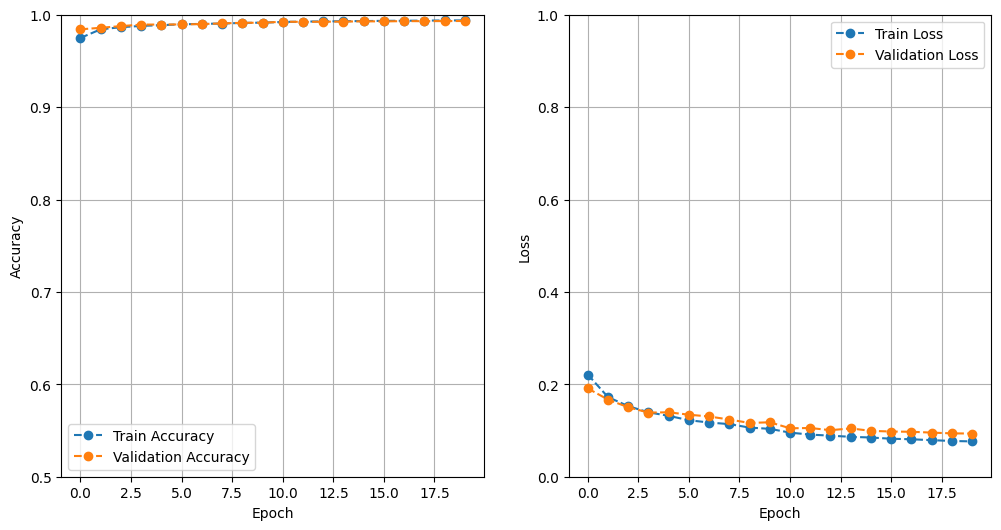

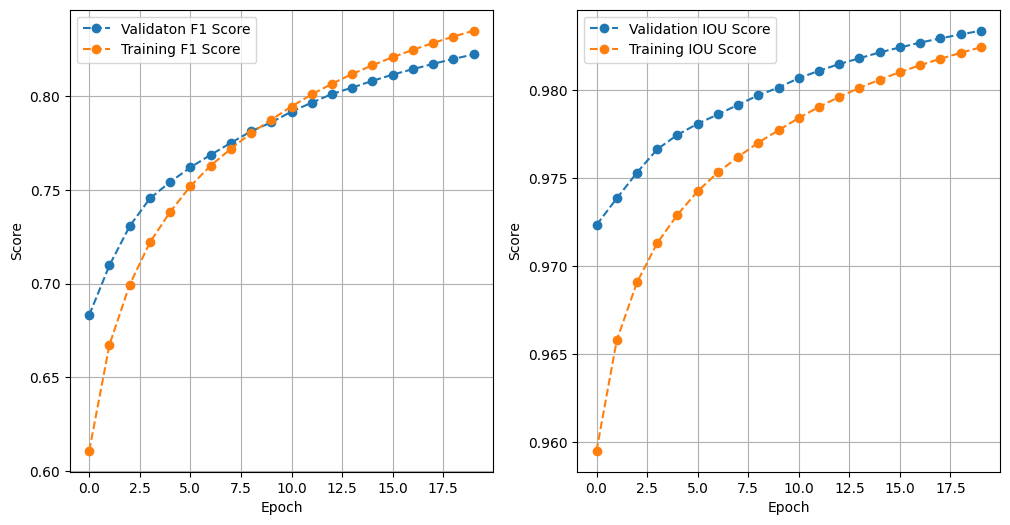

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=4,
        learning_rate=2e-4,
        epochs=20,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

In [ ]:
# %%

submission = submission_creating(
    model, path_testing, training_resize, testing_resize, cuda_available
)

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


In [ ]:
# %%

np.savetxt("submit.csv", submission, delimiter=",", fmt="%s")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


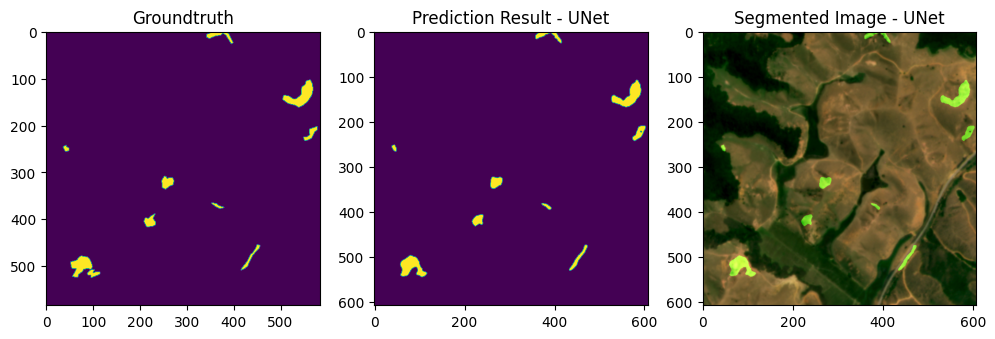

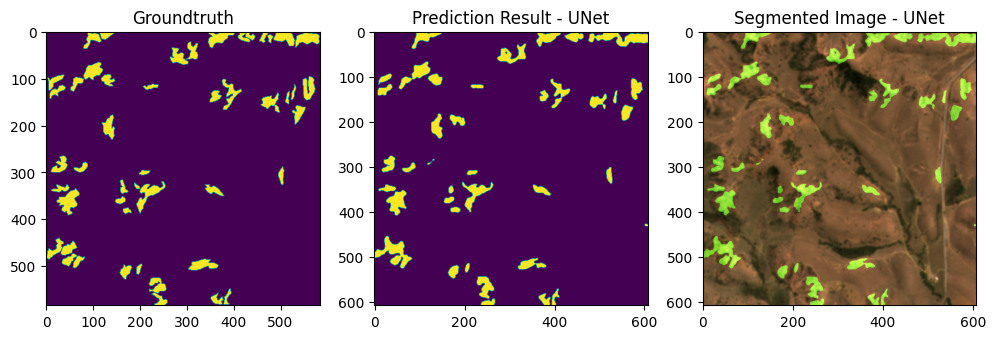

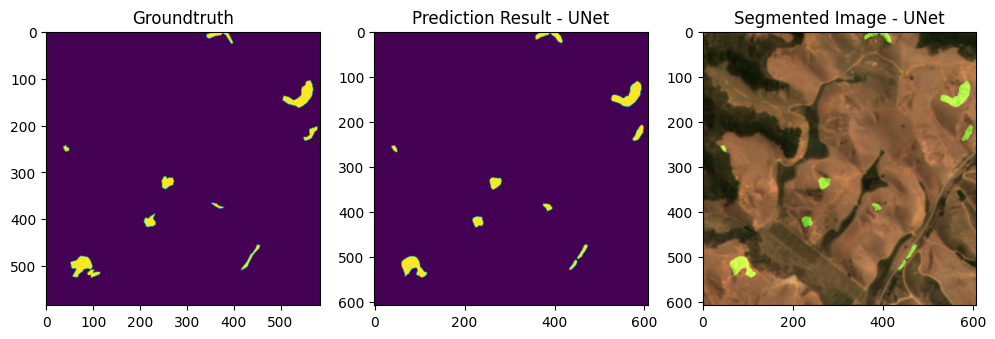

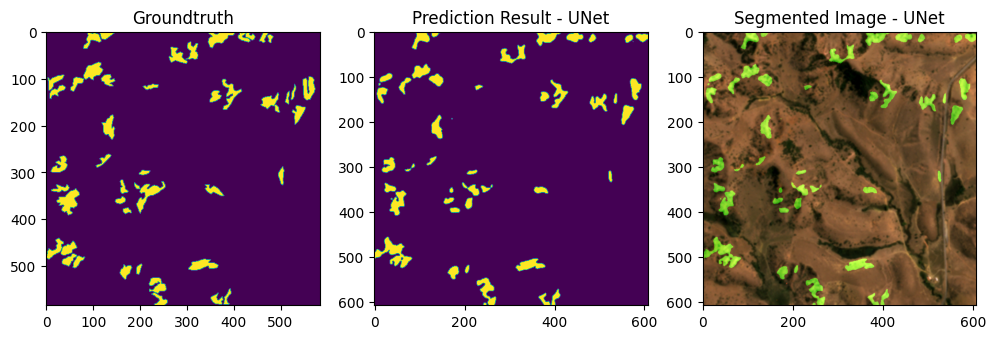

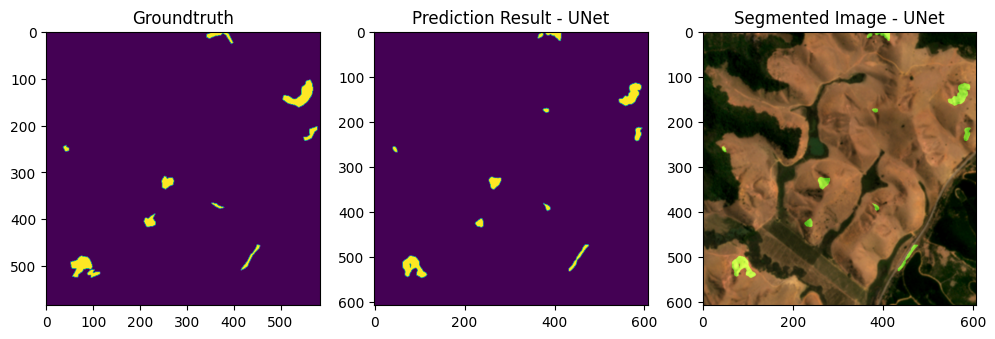

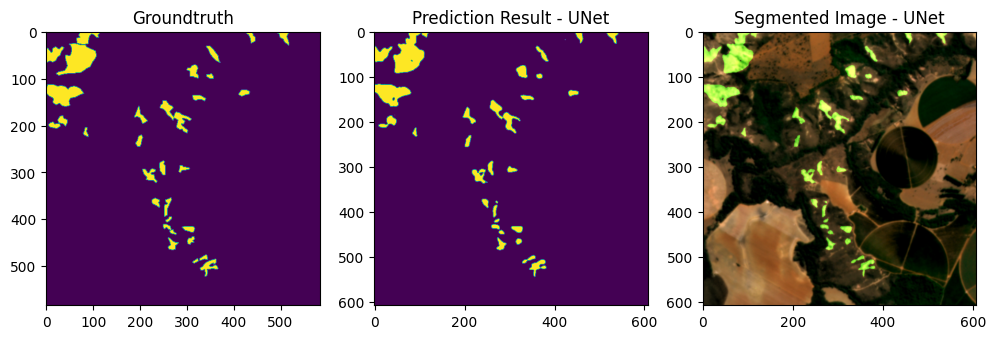

In [ ]:
# %%

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)